 # Analyse univariée

### Moyenne, Médiane et mode : 

La moyenne :

$$
\bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i
$$

Se prête très bien aux calculs algébriques, mais très
sensible aux valeurs aberrantes

In [83]:
df.Rating.mean()

4.160623310089654

In [84]:
df.Rating.count()

7027

In [85]:
df.Rating[(df.Rating < 1) | (df.Rating > 5)].count() 

0

In [86]:
df = df[~((df.Rating < 1) | (df.Rating > 5))]

In [87]:
df.Rating.mean() #pas de grosse différence il n'y avait qu'une ligne...

4.160623310089654

In [88]:
df.Rating.median()

4.3

In [89]:
test_median = pd.DataFrame({"argent_compte":[0,1,2,3,4]})
test_median

,argent_compte
0,0
1,1
2,2
3,3
4,4


In [90]:
test_median.argent_compte.mean()

2.0

In [91]:
test_median.argent_compte.median()

2.0

In [92]:
# Mesurer l'écart moyenne-médiane 

test_median.argent_compte.mean() - test_median.argent_compte.median()

0.0

In [93]:
test_median = pd.DataFrame({"argent_compte":[-1000,1,2,3,4000]})
test_median

,argent_compte
0,-1000
1,1
2,2
3,3
4,4000


In [94]:
test_median.argent_compte.mean()

601.2

In [95]:
test_median.argent_compte.median()

2.0

In [96]:
test_median.argent_compte.mean() - test_median.argent_compte.median() 
#Donne un indicateur de la dispersion de notre population

599.2

In [99]:
test_median.truncate(before=1, after=3)

,argent_compte
1,1
2,2
3,3


In [ ]:
test_median.truncate(before=1, after=3).mean()

In [100]:
dico_aberration = {"App" : [], "Rating":[]}
for i in range(0,100):
    dico_aberration ["App"].append("nom_random" + str(i)) 
    dico_aberration ["Rating"].append(30)
df_aberration  = pd.DataFrame(dico_aberration)
df_aberration

,App,Rating
0,nom_random0,30
1,nom_random1,30
2,nom_random2,30
3,nom_random3,30
4,nom_random4,30
...,...,...
95,nom_random95,30
96,nom_random96,30
97,nom_random97,30
98,nom_random98,30


In [101]:
df = df.append(df_aberration, ignore_index = True)

In [102]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
8522,nom_random90,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8523,nom_random91,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8524,nom_random92,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8525,nom_random93,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8526,nom_random94,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8527,nom_random95,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8528,nom_random96,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8529,nom_random97,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8530,nom_random98,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
8531,nom_random99,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.Rating.mean() #On passe de 4.16 à 4.52...

4.523179458397642

In [104]:
df.Rating.median()

4.3

In [105]:
df = df[~((df.Rating < 1) | (df.Rating > 5))]

In [106]:
df.Rating.describe()

count    7027.000000
mean        4.160623
std         0.559145
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [62]:
len(df["App"]) - len(df["App"].unique())

0

In [107]:
df = df.drop_duplicates(subset =["App"]) #on peut utliser l'argument inplace = true mais pas sûr que ça soit idéal.

In [108]:
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
8427,FR Forms,BUSINESS,NaN,0,9600000.0,10+,0.0,Everyone,Business
8428,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",0.0,Everyone,Education
8429,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,0.0,Everyone,Education
8430,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,"1,000+",0.0,Everyone,Medical


In [63]:
df.Rating.mean() #Une moyenne plus juste. 

4.160623310089654

#### La médiane 


La médiane est la valeur de Yi qui partage les observations rangées par ordre croissant en deux groupes de même effectif. Soit $Y_{(1)} \leq Y_{(2)} \leq \dots \leq Y_{(n)} $ 

Les observations rangées par ordre croissant, si n est impair :

$$ MED = Y_{(\frac{n-1}{2} + 1)} $$

Sinon : 

$$ MED = [Y_{(\frac{n}{2})},Y_{(\frac{n}{2} + 1)}] $$


La médiane est nettement plus robuste que la moyenne aux valeurs
extrêmes



Le mode est la valeur la plus fréquemment prise. Elle n'est pas forcément unique. 

In [64]:
df[["Price"]].value_counts()

Price 
0.00      7747
0.99       142
2.99       110
1.99        66
4.99        63
          ... 
89.99        1
4.29         1
109.99       1
3.88         1
400.00       1
Length: 87, dtype: int64

> Ce qui ouvre un aparté sur la syntaxe des lambdas expression 

In [258]:
lambda x: x+1

<function __main__.<lambda>(x)>

In [259]:
lambda x, y : x + y

<function __main__.<lambda>(x, y)>

In [260]:
(lambda x: x+1)(2)

3

In [261]:
(lambda x, y : x + y)(3,4)

7

In [262]:
df["Price"] = df["Price"].apply(lambda x : float(str(x).replace("$","")))

#Ici le str(x) que j'ai mis sert surtout à pouvoir relancer la ligne de commande sans afficher d'erreur. 

In [65]:
df["Price"].mean()

1.2259724857685008

In [66]:
df["Price"].median()

0.0

In [68]:
df["Price"].mean() - df["Price"].median()

1.2259724857685008

In [265]:
df["Price"].describe()

count    8432.000000
mean        1.225972
std        18.028685
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [83]:
df["Rating"].describe()

count    7027.000000
mean        4.160623
std         0.559145
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [266]:
df["Category"].mode()

0    FAMILY
dtype: object

In [69]:
df["Category"].value_counts()

FAMILY                 1726
GAME                    873
TOOLS                   731
BUSINESS                376
MEDICAL                 368
PERSONALIZATION         351
LIFESTYLE               334
FINANCE                 299
PRODUCTIVITY            291
SPORTS                  285
COMMUNICATION           242
HEALTH_AND_FITNESS      232
PHOTOGRAPHY             222
NEWS_AND_MAGAZINES      201
BOOKS_AND_REFERENCE     194
SOCIAL                  189
TRAVEL_AND_LOCAL        173
SHOPPING                168
DATING                  159
VIDEO_PLAYERS           127
MAPS_AND_NAVIGATION     107
EDUCATION                89
FOOD_AND_DRINK           88
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        75
ENTERTAINMENT            64
ART_AND_DESIGN           62
HOUSE_AND_HOME           62
EVENTS                   57
WEATHER                  56
PARENTING                54
COMICS                   49
BEAUTY                   47
Name: Category, dtype: int64

In [109]:
df[df["Category"] == "GAME"].Rating.mean()

4.235697115384616

In [110]:
df[df["Category"] == "FAMILY"].Rating.mean()

4.179497354497355

In [111]:
df[df["Category"] == "TOOLS"].Rating.mean()

4.00591054313099

In [112]:
df[df["Category"] == "TOOLS"].Rating.median()

4.2

In [113]:
df[df["Category"] == "TOOLS"].Rating.mean()  - df[df["Category"] == "TOOLS"].Rating.median()

-0.19408945686901014

In [114]:
df.Rating.mean()

4.160623310089654

In [82]:
df.Rating.median()

4.3

In [267]:
df["App"].mode()

0                   "i DT" Fútbol. Todos Somos Técnicos.
1                          +Download 4 Instagram Twitter
2                             - Free Comics - Comic Apps
3                                                     .R
4                                                 /u/app
                              ...                       
8427                             뽕티비 - 개인방송, 인터넷방송, BJ방송
8428                                          💎 I'm rich
8429       💘 WhatsLov: Smileys of love, stickers and GIF
8430    📏 Smart Ruler ↔️ cm/inch measuring for homework!
8431    🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Length: 8432, dtype: object

On peut aller plus loin en évoquant les moyennes tronquées. 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.truncate.html

#### Représenter la dispersion d'une variable: 

Variance d'une distribution : 

$$
V(Y) = \frac{1}{n} \sum_{i = 1}^n (Y_i - \bar{Y})^2
$$

$\bar{Y}$ étant la moyenne


On a que 

$$ V(Y) = 0 \iff Y_i = cste = \bar{Y} $$


(Plus la variance est proche de zéro moins il y a de dispersion dans le jeu de données.)

>> En revanche c'est un indicateur sensible aux valeurs de notre jeux de données

PLus intéressant : 

    l'écart_type : (Standard deviation std)

$$
\sigma = \sqrt{V(Y))}
$$

    Le Coefficient de variation :
    
$$
CV(Y) = \frac{\sigma}{\bar{Y}}
$$

>Permet la comparaison les dispersions de variables de différentes unités de mesures, veut aussi dire que cela permet la comparaison entre différentes variables 

In [117]:
cellule = pd.DataFrame({"Taille_cellule (en mm)" : [0.001,0.1,0.000001]})
cellule 

,Taille_cellule (en mm)
0,0.001000
1,0.100000
2,0.000001


In [126]:
cellule.mean()

Taille_cellule (en mm)    0.033667
dtype: float64

In [118]:
cellule.var()

Taille_cellule (en mm)    0.0033
dtype: float64

In [119]:
cellule.std()

Taille_cellule (en mm)    0.057448
dtype: float64

In [120]:
# calcul du coefficient de variation (ecart_type / moyenne)
cellule.std()/cellule.mean()

Taille_cellule (en mm)    1.706366
dtype: float64

In [121]:
batiment = pd.DataFrame({"Taille_bâtiments (en m)" : [10,20,30]})

In [122]:
batiment.var()

Taille_bâtiments (en m)    100.0
dtype: float64

In [123]:
batiment.std()

Taille_bâtiments (en m)    10.0
dtype: float64

In [125]:
# calcul du coefficient de variation (ecart_type / moyenne)
batiment.std()/batiment.mean()

Taille_bâtiments (en m)    0.5
dtype: float64

In [127]:
df["Reviews"].value_counts()

0          554
1          268
2          211
3          168
4          133
          ... 
15105        1
32597        1
12955        1
1185148      1
484          1
Name: Reviews, Length: 4304, dtype: int64

In [129]:
df["Price"].mean()

1.2259724857685008

In [128]:
Coeff_variation_Price = df["Price"].std() / df["Price"].mean() 
Coeff_variation_Rating = df["Rating"].std() / df["Rating"].mean() 

print(Coeff_variation_Price,Coeff_variation_Rating) #sans surprise les Rating sont entre 1 et 5...

14.705619480051915 0.1343898367989051


#### Les quantiles : 

Une généralisation de la médiane :

Le quantile d'ordre $\alpha$ est la plus petite valeur prise par Y de sorte que plus de $\alpha\%$ de l'échantillon ait une valeur inférieur.


La mediane correspond au quantile d'ordre 0.5

Les quartiles correspondent aux quantiles d'ordre 0.25 et 0.75

Les déciles correspondent aux ordre 0.1,. . . ,0.9

Le tout vient de la fonction de répartition (PDF à montrer et formule à écrire selon le besoin) (compter pour un x donné le nombre de données inférieur par rapport aux données totales) 


In [109]:
Fct_repartition = df.groupby("Price").count()
Fct_repartition = Fct_repartition[["App"]]
Fct_repartition = Fct_repartition.rename(columns = {"App": "Compteur"})
Fct_repartition["Compteur"] = Fct_repartition["Compteur"]/ sum(Fct_repartition["Compteur"])
Fct_repartition["Compteur"] = Fct_repartition["Compteur"].cumsum()
Fct_repartition[["Compteur"]]

,Compteur
Price,
0.00,0.918762
0.99,0.935602
1.00,0.935958
1.04,0.936077
1.20,0.936195
...,...
379.99,0.998221
389.99,0.998340
394.99,0.998458


<AxesSubplot:xlabel='Price'>

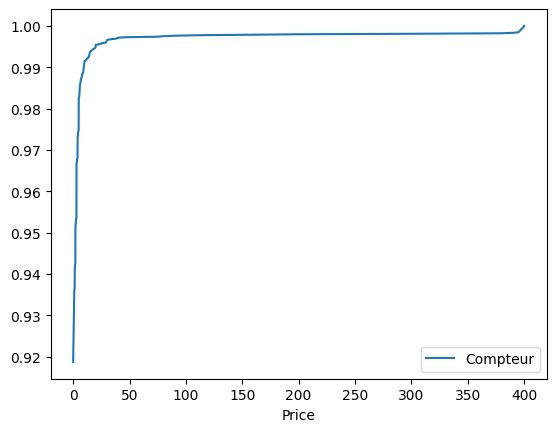

In [110]:
Fct_repartition[["Compteur"]].plot()

In [115]:
L = np.array([1,2,3])
L*3

array([3, 6, 9])

In [119]:
print(np.arange(0,1,0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [130]:
df[["Rating"]].quantile(0.5)

Rating    4.3
Name: 0.5, dtype: float64

In [131]:
df[["Rating"]].median()

Rating    4.3
dtype: float64

In [132]:
df[["Rating"]].quantile(np.arange(0,1,0.1))

,Rating
0.0,1.0
0.1,3.5
0.2,3.8
0.3,4.0
0.4,4.2
0.5,4.3
0.6,4.4
0.7,4.5
0.8,4.6
0.9,4.7


In [132]:
df.Rating.mean()

4.160623310089654

In [133]:
df[(df.Rating > 3.5) & (df.Rating < 4.7) ].Rating.mean() #mesurer une moyenne ajustée.

4.223237697130914

In [133]:
df[["Price"]].quantile(np.arange(0,1,0.1))

,Price
0.0,0.0
0.1,0.0
0.2,0.0
0.3,0.0
0.4,0.0
0.5,0.0
0.6,0.0
0.7,0.0
0.8,0.0
0.9,0.0


In [141]:
df[["Price"]].quantile(0.91)

Price    0.0
Name: 0.91, dtype: float64

In [283]:
df[["Rating"]].quantile(np.arange(0,1,0.1))

,Rating
0.0,1.0
0.1,3.5
0.2,3.8
0.3,4.0
0.4,4.2
0.5,4.3
0.6,4.4
0.7,4.5
0.8,4.6
0.9,4.7


#### Un mot sur numpy :

https://numpy.org/doc/stable/user/basics.creation.html#arrays-creation

https://numpy.org/doc/stable/reference/routines.array-creation.html

<AxesSubplot:>

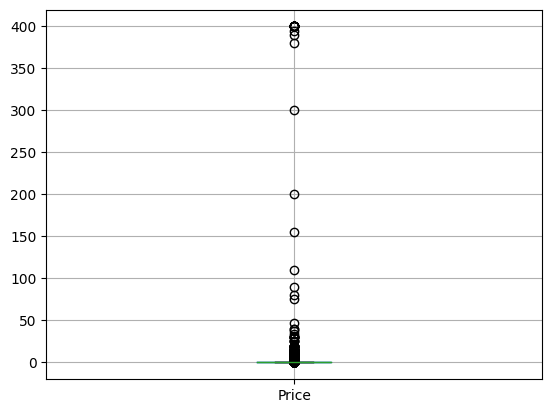

In [284]:
df[["Price"]].boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6d35f09b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6d35fffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6d35ffb38>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6d361e898>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1d6d361eb70>]}

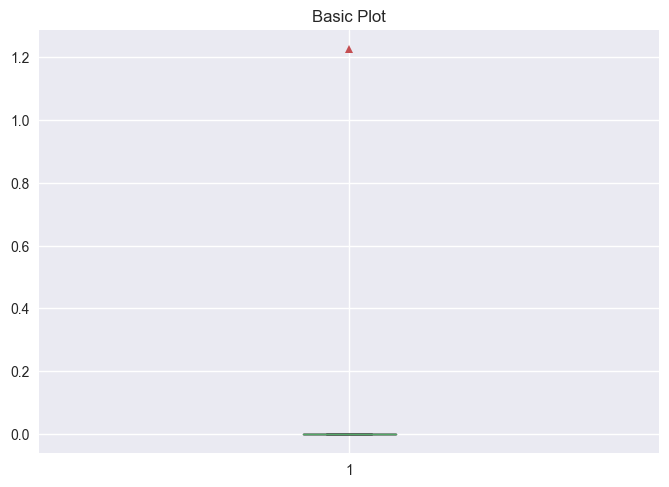

In [134]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df[["Price"]], showfliers = False, showmeans =True) 


In [135]:
df[["Rating"]] = df[["Rating"]].astype(float)
df = df[~(df.Rating.isna())]

In [136]:
df.Rating.describe()

count    7027.000000
mean        4.160623
std         0.559145
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [137]:
df.Rating.quantile(0.05)

3.1

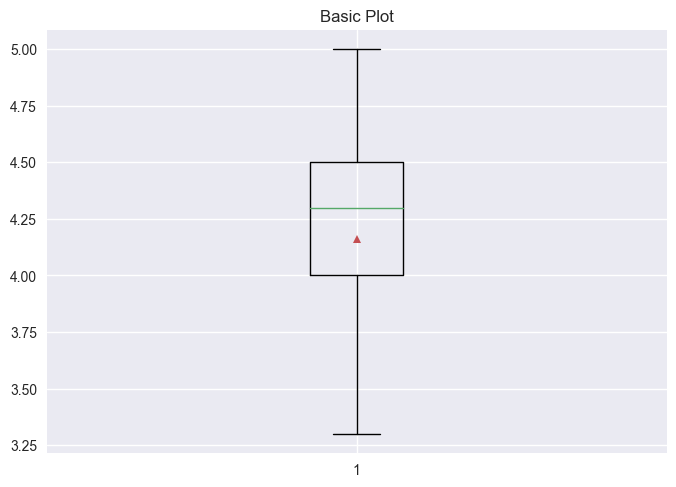

In [138]:
#Boîte à moustache ou boite de Tukey

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df[["Rating"]], showfliers = False, showmeans = True )
plt.show()

# Matplotlib : 

#### (et SEABORN OU PLOTLY)

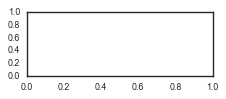

In [95]:
plt.figure(figsize=(3,1))
plt.subplot(111) 
plt.show() 

In [141]:
x = np.linspace(0, 5, 100)  #Return evenly spaced numbers over a specified interval.
y = x ** 2

In [143]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

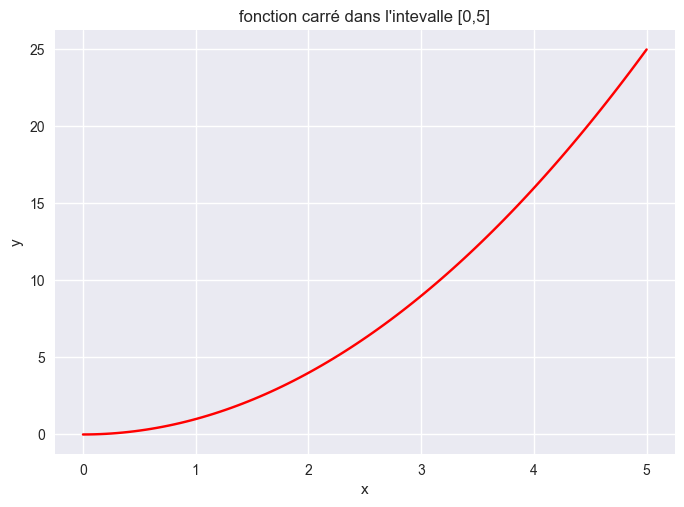

In [145]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("fonction carré dans l'intevalle [0,5]")
plt.show()

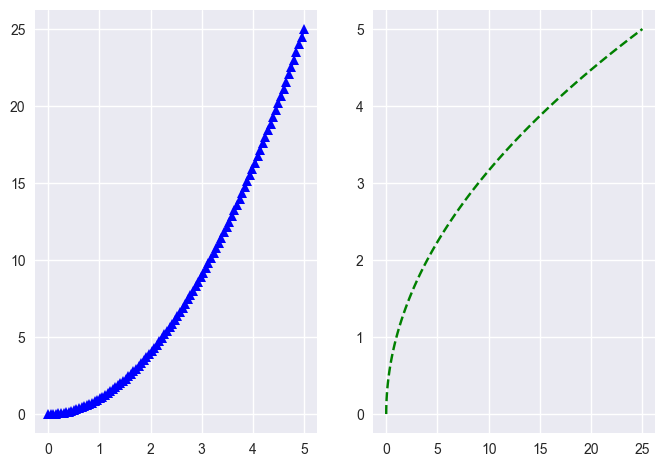

In [146]:
plt.subplot(1,2,1)  #(nrows, ncols, index). 
plt.plot(x, y, '^b:')
plt.subplot(1,2,2)
plt.plot(y, x, 'g--')

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html 
>pour les différents marqueurs à afficher 

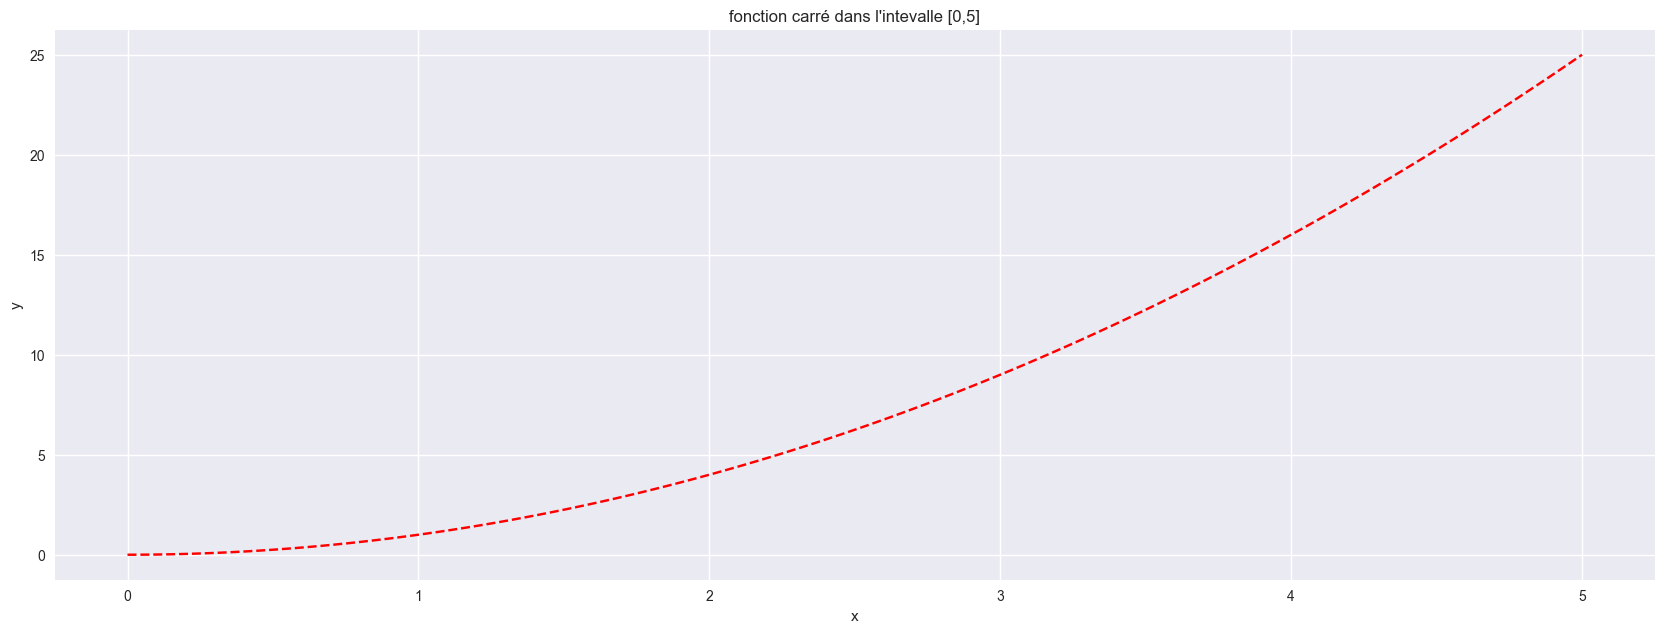

In [147]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 2, 1]) # left, bottom, width, height (range 0 to 1, depends on figure's defined size)

axes.plot(x, y, 'r--')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title("fonction carré dans l'intevalle [0,5]")
plt.show()

In [148]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [149]:
plt.style.use('seaborn-white')

[]

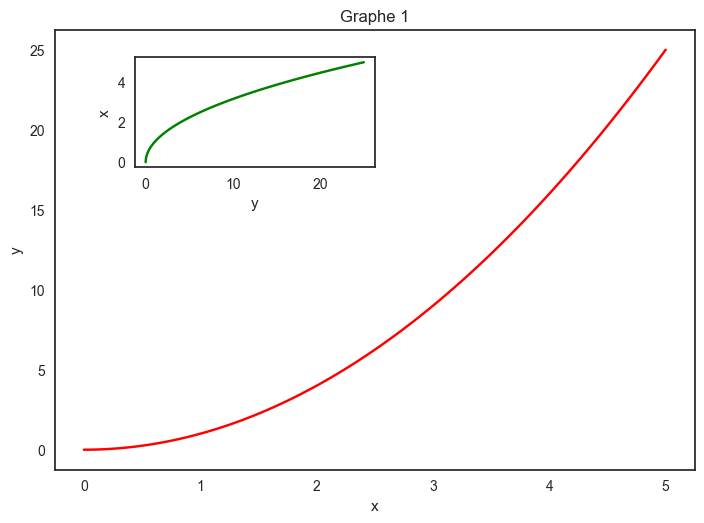

In [152]:
fig = plt.figure() #Pas de subplots, les graphes se superposent... ça peut être voulu

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.65, 0.3, 0.2])

# Fenêtre principal 
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Graphe 1')

# Sous fenêtre
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
plt.plot()

In [153]:
fig.savefig("image_final.png",dpi = 200) #The resolution of the figure in dots-per-inch.

#fig ici a été définie juste au dessus, on pourrait le nommer différemment pour enregistrer nos images à la toute fin.

##### Legends, labels et titres : 

In [154]:
x = np.linspace(0, 1, 100) 

Text(0.5, 1.0, 'Fonction cube et carré')

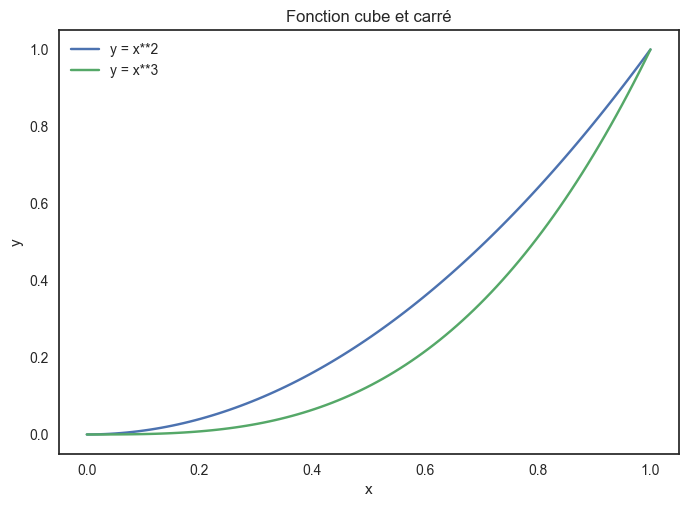

In [155]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Fonction cube et carré')

In [156]:
L = ["#fafa6e","#b5e877","#77d183","#3fb78d","#009c8f","#007f86","#1c6373","#2a4858"]
for i,k in enumerate(L):
    print(i,k)

0 #fafa6e
1 #b5e877
2 #77d183
3 #3fb78d
4 #009c8f
5 #007f86
6 #1c6373
7 #2a4858


c:\cours_python\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


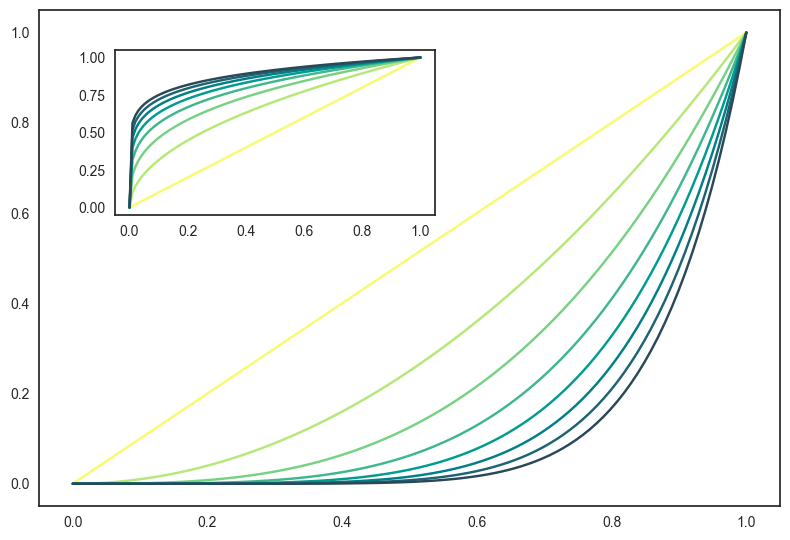

In [157]:
fig, ax1 = plt.subplots()



ax2 = fig.add_axes([0.15, 0.6, 0.4, 0.3])
L = ["#fafa6e","#b5e877","#77d183","#3fb78d","#009c8f","#007f86","#1c6373","#2a4858"]


for i,k in enumerate(L):
    ax1.plot(x, x**(i+1), color=k)
    
for i,k in enumerate(L):
    ax2.plot(x, x**(1/(i+1)), color=k)

fig.tight_layout()

### Différents plots 

https://matplotlib.org/2.0.2/gallery.html

In [160]:
n = np.array([0,1,2,3,4,5])

[]

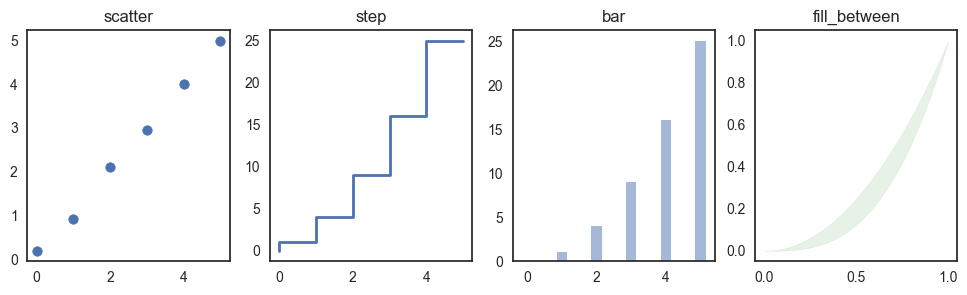

In [161]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(n, n + 0.25*np.random.randn(len(n)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.3, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.1) #Intéressant pour mettre en évidence des différences
axes[3].set_title("fill_between") #(courbe de Lorenz par exemple)
plt.plot()

In [164]:
df.Rating

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
8425    4.8
8426    4.0
8428    4.5
8429    5.0
8431    4.5
Name: Rating, Length: 7027, dtype: float64

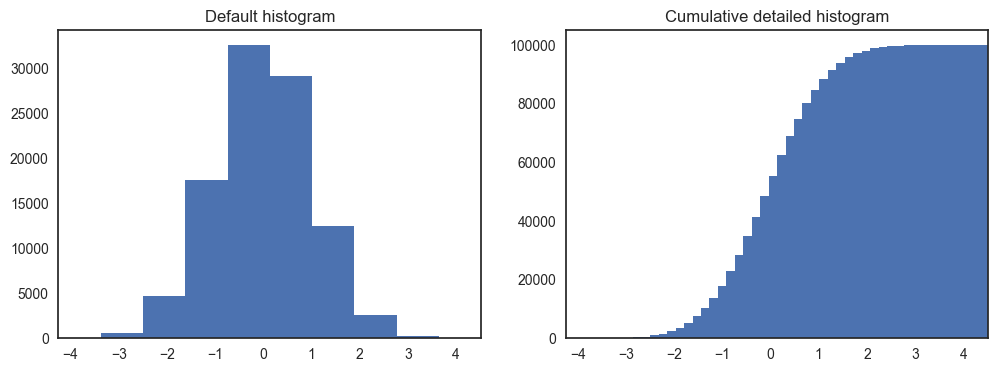

In [165]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)))
plt.show() #Pas nécessaire sur jupyter mais sur un fichier .py 

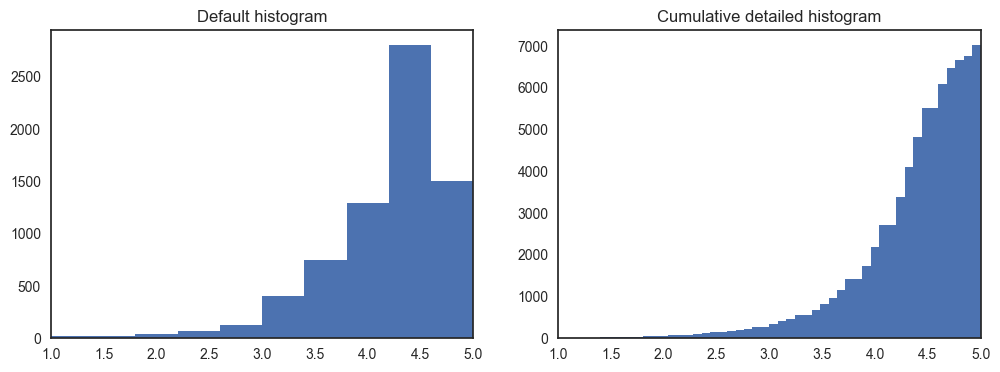

In [166]:
# A histogram
n = df.Rating
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)))
plt.show() #Pas nécessaire sur jupyter mais sur un fichier .py 

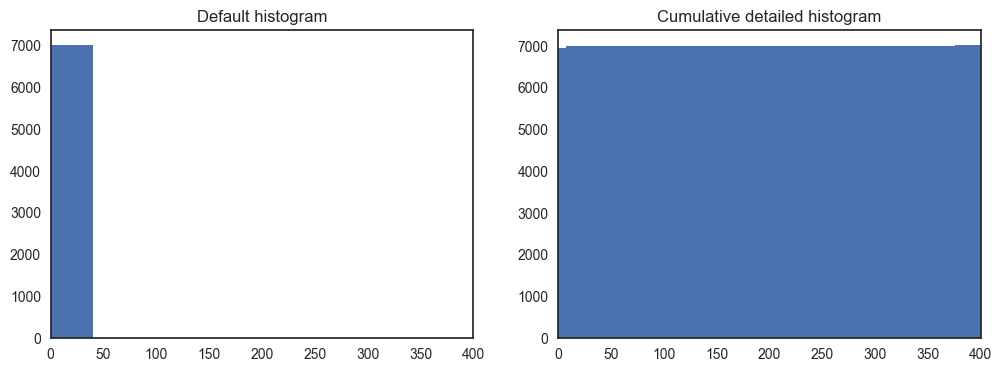

In [167]:
# A histogram
n = df.Price
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)))
plt.show() #Pas nécessaire sur jupyter mais sur un fichier .py 

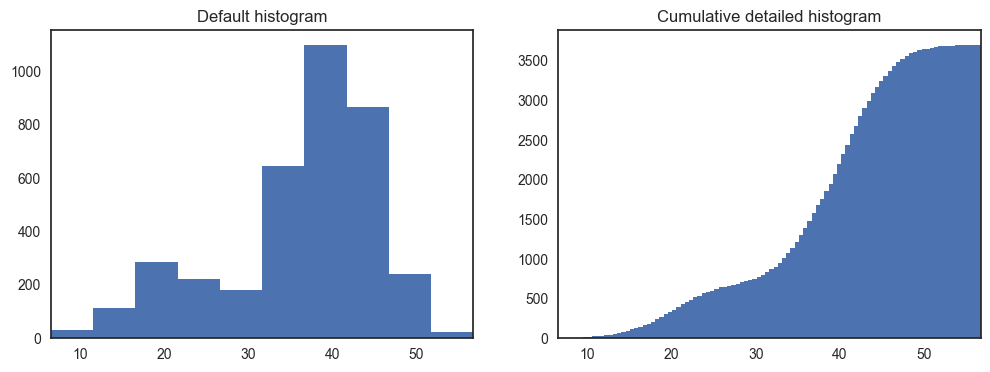

In [168]:
sample1 = np.random.normal(loc=20, scale=5, size=700)
sample2 = np.random.normal(loc=40, scale=5, size=3000)
sample = np.hstack((sample1, sample2))


fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(sample)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(sample), max(sample)))

axes[1].hist(sample, cumulative=True, bins=100)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(sample), max(sample)))
plt.show()

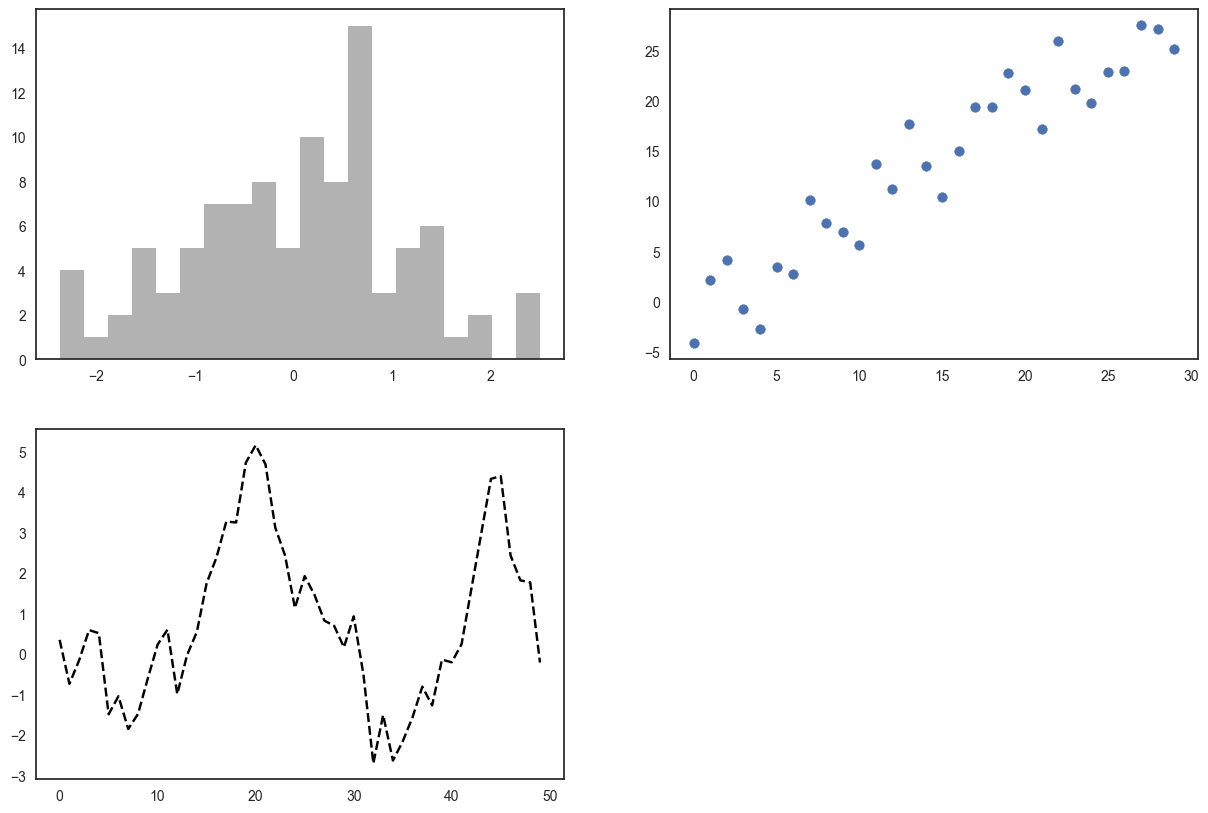

In [169]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
#ax4 = fig.add_subplot(2,2,4)

# On peut compléter les instances de sous graphiques par leur contenu.
# Au passage, quelques autres exemples de graphes

ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(),'k--')

<class 'numpy.ndarray'>


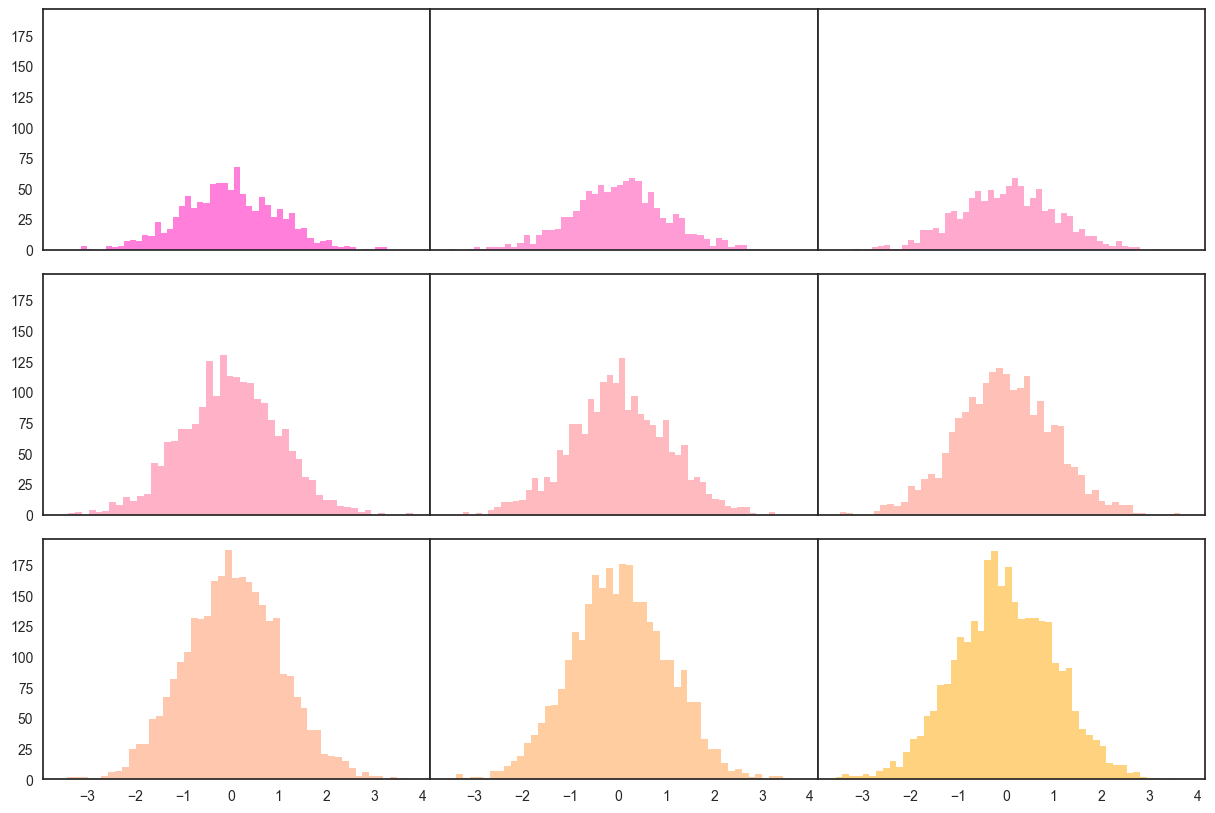

In [187]:
fig,axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(15,10))
# Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
# ont des axes paramétrés de la même manière

L = ['#ff00b8',
'#ff3bac',
'#ff549f',
'#ff6691',
'#ff7682',
'#ff8471',
'#ff915c',
'#ff9c41',
'#ffa700']

for i in range(3):
    for j in range(3):
        axes[i,j].hist(np.random.randn(1000*(i+1)),bins=50,color=L[int(str(i) + str(j), 3)],alpha=0.5)
# L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
print(type(axes))

# N'h'ésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
plt.subplots_adjust(wspace=0,hspace=0.1)
plt.show()
# Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

In [188]:
fig.savefig("image_final.png",dpi = 200) 

In [189]:
serie1=np.random.randn(50).cumsum()
serie2=np.random.randn(50).cumsum()
serie3=np.random.randn(50).cumsum()

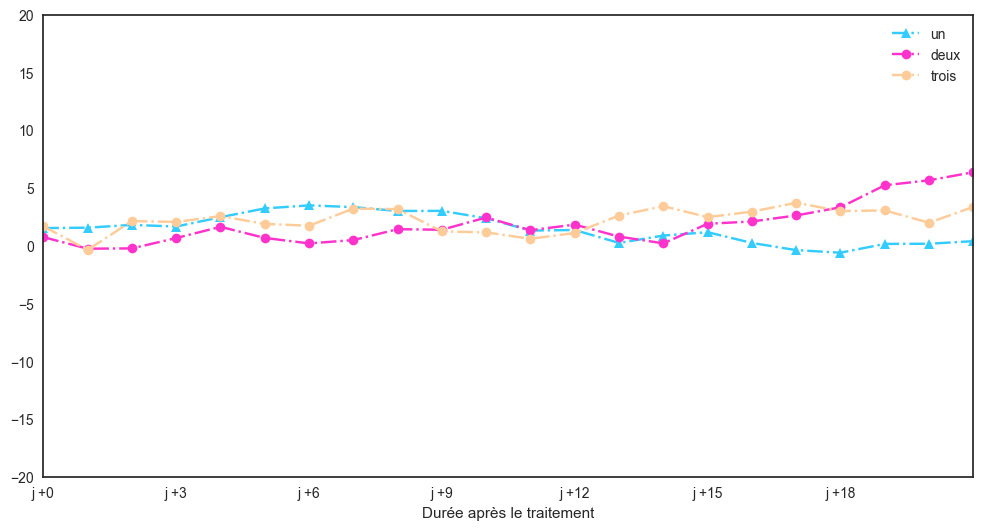

In [190]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(serie1,color='#33CCFF',marker='^',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

#sur le graphe précédent, pour raccourcir le range
ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])

#faire un ticks avec un pas de 3 (au lieu de 5)
ax1.set_xticks(range(0,21,3))

#changer le label sur la graduation
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,3)])
ax1.set_xlabel('Durée après le traitement')

ax1.legend(loc='best') 

#permet de choisir l'endroit le plus vide, mais on peut le faire manuellement

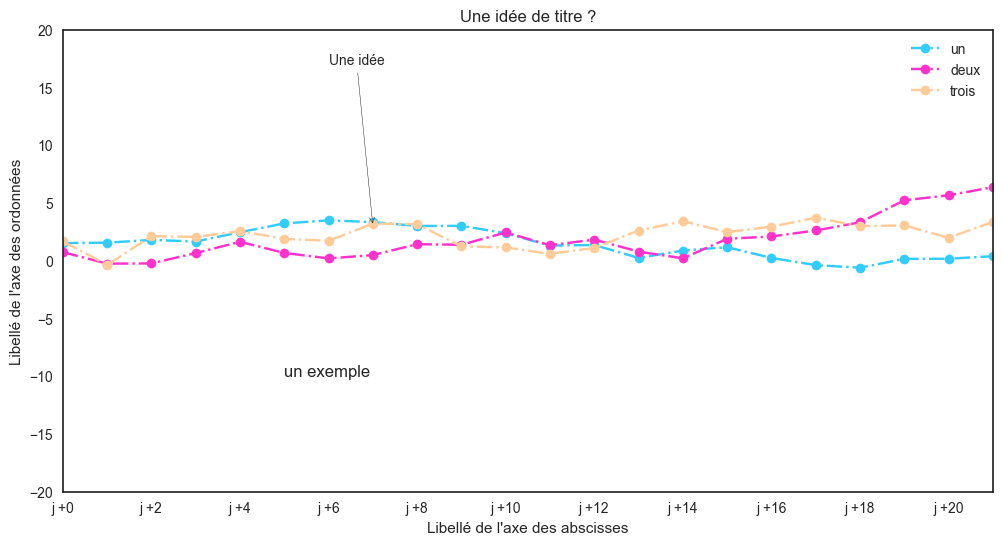

In [191]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)


ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
ax1.set_xticks(range(0,21,2))
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.annotate("Une idée", xy=(7, 3), #point de départ de la flèche
             xytext=(6, 17),          #position du texte
            arrowprops=dict(arrowstyle="->",facecolor='#ff00b8'),
            )

ax1.legend(loc='best')

plt.xlabel("Libellé de l'axe des abscisses")
plt.ylabel("Libellé de l'axe des ordonnées")
plt.title("Une idée de titre ?")
plt.text(5, -10, r'un exemple',fontsize = "large")

plt.show()

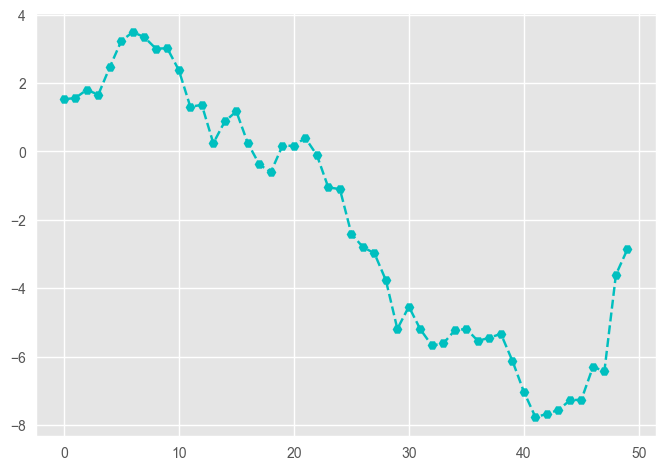

In [192]:
with plt.style.context('ggplot'):
    plt.plot(serie1, 'c--H')

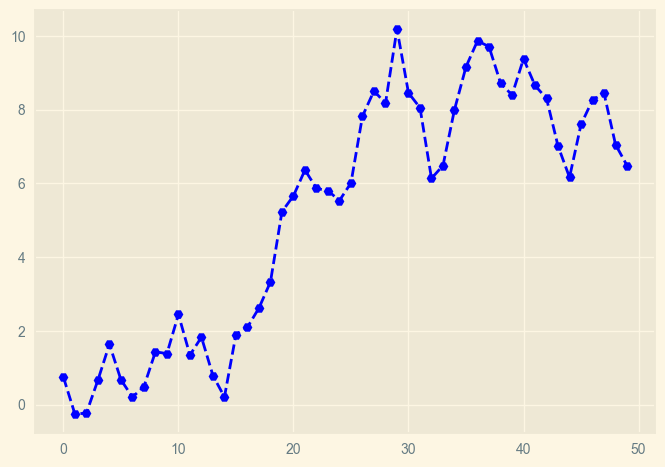

In [193]:
with plt.style.context('Solarize_Light2'):
    plt.plot(serie2, 'b--H')

## Seaborn : 

https://seaborn.pydata.org/tutorial/function_overview.html

https://seaborn.pydata.org/tutorial/aesthetics.html